<h1 align='center'> Netflix Data Analysis <h1>



# Data used:
Netflix is one of the most popular media and video streaming platforms. They have over 9000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Analysis**

**Loading the dataset**

**Data Cleaning:** 
 - Deleting redundant columns.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - Some Transformations
 
**Data Visualization:** 
- Type: Movie and TV Shows
- Rating IMDB 
- Relation between Type and Rating
- dasd




#####  Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



 **Loading the dataset**

In [ ]:
df = pd.read_excel('Netflix.xls')
df.head()

##### Check for NULL Values

In [ ]:
df.isnull().sum()

In [ ]:
import missingno as msno

msno.matrix(df)
plt.show()

##### Show the top 20 most frequent languages.


In [ ]:

pd.set_option("display.max_rows", None)
df["Languages"].value_counts().head(20)


##### This code is cleaning the "Languages" column by removing all the rows where the value is null, and also removing the language "English" from the field when there are multiple languages in the same field.

In [ ]:
df = df[df["Languages"].notnull()]
df.loc[df["Languages"].str.count(" ") > 0, "Languages"] = df["Languages"].str.replace("English", "")

##### Replace all commas (,) in the "Languages" column 

In [ ]:
df['Languages'] = df['Languages'].str.replace(',','')
df['Languages'].value_counts()

##### Remove leading and trailing whitespaces from the "Languages" column

In [ ]:
df["Languages"] = df["Languages"].str.strip()


##### Creates a bar chart to display the top 10 most frequent languages

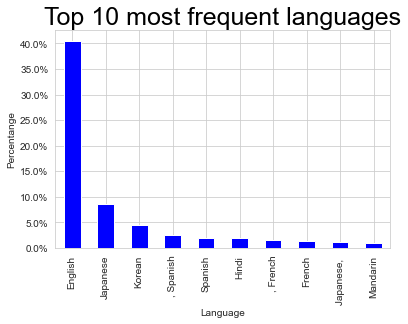

<Figure size 72x360 with 0 Axes>

In [118]:
fig=plt.figure()

top_languages = df["Languages"].value_counts(normalize=True).head(10)

top_languages.plot(kind='bar', color="Blue")

import matplotlib.ticker as ticker

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

plt.title('Top 10 most frequent languages', color='black', fontsize=25)
plt.xlabel('Language')
plt.ylabel('Percentange')
plt.figure(figsize=(1,5))
fig.set_facecolor("white")

plt.show()


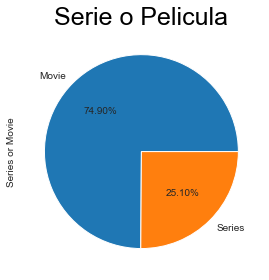

In [115]:
#Un grafico de torta para ver la cantidad de series y peliculas
fig=plt.figure()
df["Series or Movie"].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.title ("Serie o Pelicula", color='black', fontsize=25)
plt.tight_layout() #evitar el superposicionamiento
fig.set_facecolor("white")
plt.show()


In [ ]:
#Datos Generales de IMDB
Datos_IMDB = df["IMDb Score"].describe()
Datos_IMDB

In [ ]:
#Gráfico para ver el puntaje según el idioma
df.rename(columns= {"Languages":"Idioma"}, inplace = True)
df.loc[df["Idioma"].str.count(" ") > 0, "Idioma"] = df["Idioma"].str.replace("English", "")
df['Idioma'] = df['Idioma'].str.replace(',','')
df['Idioma'].value_counts()
df["Idioma"] = df["Idioma"].str.strip()

#Armo la tabla, solo con los idiomas que aparecen en más de 50 ocasiones
filtered_table = df[df.groupby('Idioma').Idioma.transform('size') > 50]
table = filtered_table.groupby("Idioma")["IMDb Score"].mean().reset_index()
top_10_languages = table.nlargest(10, 'IMDb Score')
print(top_10_languages)

#Grafico de Box
fig=plt.figure()
sns.boxplot(x='Idioma', y='IMDb Score', data=filtered_table[filtered_table['Idioma'].isin(top_10_languages['Idioma'])])
plt.title("IMDb Puntaje por Idioma")
plt.xlabel("Idioma")
plt.ylabel("IMDb Puntaje")
plt.xticks(rotation=45)
fig.set_facecolor("white")

In [ ]:
#Veo que está separado en demasiados subgeneros
df['Genre'].value_counts()

In [ ]:
#Se observa la cantidad de subgeneros existentes
print(df['Genre'].nunique())


In [ ]:
#Dejo solo la primera palabra la columna para distinguir a los Generos de forma más clara
df['Genero'] = df['Genre'].str.split().str[0]
df['Genero'].value_counts()

In [ ]:
#Le quito las comas a quienes les quedó
df['Genero'] = df['Genero'].str.replace(',','')
df['Genero'].value_counts()

In [ ]:
df = df.dropna(subset=["IMDb Score"])


In [ ]:
#Promedio de Puntuación en IMDb por Género
import matplotlib.pyplot as plt
fig=plt.figure()

# Obtener los 10 valores más repetidos de "Genero"
top_genres = df["Genero"].value_counts().head(10)

# Agrupar los datos por "Genero" y calcular el promedio de "IMDb Score" para cada "Genero"
genres_data = df[df["Genero"].isin(top_genres.index)].groupby("Genero")["IMDb Score"].mean().sort_values()

# Crear el gráfico de barras
fig, ax = plt.subplots()
ax.bar(genres_data.index, genres_data.values, edgecolor='black')
ax.set_title('Promedio de Puntuación en IMDb por Género')
ax.set_xlabel('Género')
ax.set_ylabel('Promedio de Puntuación')
fig.set_facecolor("white")
plt.xticks(rotation=45)

plt.show()



In [ ]:
# Un gráfico de cajas para visualizar los Promedio de Puntuación en IMDb por Género
fig=plt.figure()

# Obtener los 10 valores más repetidos de "Genero"
top_genres = df["Genero"].value_counts().head(10)

# Agrupar los datos por "Genero"
genres_data = df[df["Genero"].isin(top_genres.index)].groupby("Genero")["IMDb Score"]

# Crear la lista de datos
data = [group.values for _, group in genres_data]

# Crear el gráfico de boxplot
fig, ax = plt.subplots()
ax.boxplot(data, labels=genres_data.groups.keys())
ax.set_title('Promedio de Puntuación en IMDb por Género')
ax.set_xlabel('Género')
ax.set_ylabel('Promedio de Puntuación')
fig.set_facecolor("white")
plt.xticks(rotation=45)

plt.show()



In [ ]:
# Observo los géneros más frecuentes en la plataforma
fig=plt.figure()
ax = plt.gca()
value_counts = df['Genero'].value_counts(normalize=True)
value_counts.head(10).plot(kind='bar', edgecolor='black')
ax.set_title('Porcentaje de los géneros más frecuentes')
ax.set_ylabel('Porcentaje', color = "blue")
ax.set_xlabel('Género', color = "blue")
ax.yaxis.set_label_coords(-0.2,0.5)
ax.xaxis.set_label_coords(-0.1,-0.1)

fig.set_facecolor("white")

plt.show()



In [ ]:
fig=plt.figure()
table = df.groupby("Runtime")["IMDb Score"].mean().reset_index()
sns.barplot(x="Runtime", y="IMDb Score", data=table, color="blue", edgecolor='black')
plt.title("Promedio de IMDb Score por Runtime")
plt.xlabel("Runtime")
plt.ylabel("Promedio de IMDb Score")
fig.set_facecolor("white")
#No sirve estte gráfico porque hay un error en la base de datos y todas las series están clasificadas como menores a 30 minutos




In [ ]:
#Gráfico para ver la diferencia de puntaje entre Serie y Pelicula
df.loc[df["Series or Movie"] == "Movie", "Series or Movie"] = "Pelicula"#Cambio Movie por Pelicula

table = df.groupby("Series or Movie")["IMDb Score"].mean().reset_index()
sns.set_style("whitegrid")
sns.barplot(x="Series or Movie", y="IMDb Score", data=table)
plt.title("Promedio de puntaje de IMDb por Serie o Pelicula")
plt.xlabel("")
plt.ylabel("Promedio de IMDb Score")
plt.show()


In [ ]:
#Gráfico para ver el puntaje según el idioma
df.rename(columns= {"Languages":"Idioma"}, inplace = True)
df.loc[df["Idioma"].str.count(" ") > 0, "Idioma"] = df["Idioma"].str.replace("English", "")
df['Idioma'] = df['Idioma'].str.replace(',','')
df['Idioma'].value_counts()
df["Idioma"] = df["Idioma"].str.strip()

#Armo la tabla, solo con los idiomas que aparecen en más de 50 ocasiones
filtered_table = df[df.groupby('Idioma').Idioma.transform('size') > 50]
table = filtered_table.groupby("Idioma")["IMDb Score"].mean().reset_index()
top_10_languages = table.nlargest(10, 'IMDb Score')
print(top_10_languages)

#Grafico de Box
fig=plt.figure()
sns.boxplot(x='Idioma', y='IMDb Score', data=filtered_table[filtered_table['Idioma'].isin(top_10_languages['Idioma'])])
plt.title("IMDb Puntaje por Idioma")
plt.xlabel("Idioma")
plt.ylabel("IMDb Puntaje")
plt.xticks(rotation=45)
fig.set_facecolor("white")




In [ ]:
df["Netflix Release Date"] = pd.to_datetime(df["Netflix Release Date"], errors='coerce')
print(df["Netflix Release Date"].isna().sum())


In [ ]:
pd.to_datetime(df["Netflix Release Date"], format='%Y-%m-%d')

In [ ]:
df['Genre'] = df['Genre'].str.split().str[0]
df['Genre'].value_counts()
df['Genre'] = df['Genre'].str.replace(',','')
df['Genre'].value_counts()

# Count the number of occurrences of each genre
genre_counts = df['Genre'].value_counts()

# Select the top 4 most common genres
top_4_genres = genre_counts.nlargest(4).index

# Filter the DataFrame to only include rows with the top 4 genres
filtered_df = df[df['Genre'].isin(top_4_genres)]

# Create a pivot table with the average runtime for each genre
pivot_table = filtered_df.pivot_table(values='Runtime', index='Genre', aggfunc='mean')
pivot_table

In [ ]:
# Count the number of occurrences of each value in the 'Genre' column
genre_counts = df['Genre'].value_counts()

# Select the top 5 most common values
top_5_genres = genre_counts.nlargest(5).index

# Filter the dataframe to only include rows with the top 5 genres
filtered_df = df[df["Series or Movie"] == "Movie"]

filtered_df = df[df['Genre'].isin(top_5_genres)] 


# Group the dataframe by 'Genre' and 'Runtime' and count the number of occurrences
counts = filtered_df.groupby(['Genre', 'Runtime']).size().reset_index(name='Counts')
counts = counts.sort_values('Counts', ascending=False)

# Plot the bar chart with stacked bars
fig=plt.figure()
sns.barplot(x='Genre', y='Counts', hue='Runtime', data=counts)
plt.xlabel('Genero', color='black', fontsize=15)
plt.ylabel('Cantidad', color='black', fontsize=15)
plt.title("Relación entre Genero y Duración", color='black', fontsize=25)
fig.set_facecolor("white")




In [ ]:
start_date = '2016-01-01'
end_date = '2021-01-01'
df = df[(df['Netflix Release Date'] >= start_date) & (df['Netflix Release Date'] < end_date)]

# Group the data by month and movie/series type
df_grouped = df.groupby([df["Netflix Release Date"].dt.month, "Series or Movie"]).size().reset_index(name='counts')

# Create the line plot

plt.figure(figsize=(10,5))
fig=plt.figure()

for key, grp in df_grouped.groupby("Series or Movie"):
    plt.plot(grp["Netflix Release Date"], grp["counts"], label=key)
    

plt.legend()
plt.xlabel('Meses')
plt.ylabel('Cantidad de peliculas estrenadas')
fig.set_facecolor("white")
plt.show()





In [ ]:
start_date = '2016-01-01'
end_date = '2021-01-01'
df = df[(df['Netflix Release Date'] >= start_date) & (df['Netflix Release Date'] < end_date)]

# Group the data by month and movie/series type
df_grouped = df.groupby([df["Netflix Release Date"].dt.year, "Series or Movie"]).size().reset_index(name='counts')

# Create the line plot

plt.figure(figsize=(10,5))
fig=plt.figure()

for key, grp in df_grouped.groupby("Series or Movie"):
    plt.plot(grp["Netflix Release Date"], grp["counts"], label=key)
    

plt.legend()
plt.xlabel('Años')
plt.ylabel('Cantidad de peliculas estrenadas')
fig.set_facecolor("white")
plt.show()

In [ ]:
df["year"] = df["Netflix Release Date"].dt.year
df["month"] = df["Netflix Release Date"].dt.month

# Group the data by year, month and movie/series type
df_grouped = df.groupby([df["year"], df["month"], "Series or Movie"]).size().reset_index(name='counts')

# Pivot the table
df_pivot = df_grouped.pivot_table(index=['year', 'month'], columns='Series or Movie', values='counts', aggfunc='sum')

# Print the table
print(df_pivot)






In [ ]:
df["year"] = df["Netflix Release Date"].dt.year
df["month"] = df["Netflix Release Date"].dt.month

# Group the data by year, month and movie/series type
df_grouped = df.groupby([df["year"], df["month"], "Series or Movie"]).size().reset_index(name='counts')

# Pivot the table
df_pivot = df_grouped.pivot_table(index=['year', 'month'], columns='Series or Movie', values='counts', aggfunc='sum')

# Print the table
print(df_pivot)




In [ ]:
start_date = '2016-01-01'
end_date = '2021-01-01'
df = df[(df['Netflix Release Date'] >= start_date) & (df['Netflix Release Date'] < end_date)]

# Group the data by month and movie/series type
df_grouped = df.groupby([df["Netflix Release Date"].dt.month, "Series or Movie"]).size().reset_index(name='counts')

# Create the line plot

plt.figure(figsize=(10,5))
fig=plt.figure()

for key, grp in df_grouped.groupby("Series or Movie"):
    plt.plot(grp["Netflix Release Date"], grp["counts"], label=key)
    

plt.legend()
plt.xlabel('Meses')
plt.ylabel('Cantidad de peliculas estrenadas')
fig.set_facecolor("white")
plt.show()




In [ ]:
start_date = '2016-01-01'
end_date = '2021-01-01'
df = df[(df['Netflix Release Date'] >= start_date) & (df['Netflix Release Date'] < end_date)]

from bokeh.plotting import figure, show

#Convertir la columna "Netflix Release Date" a formato fecha utilizando la función pd.to_datetime()
df["Netflix Release Date"] = pd.to_datetime(df["Netflix Release Date"])

# Agrupar los datos por año y tipo de película/serie
df_agrupado = df.groupby([df["Netflix Release Date"].dt.to_period('Y'), "Series or Movie"]).size().reset_index(name='counts')

# Crear el gráfico de líneas
p = figure(width=800, height=400)

for key, grp in df_agrupado.groupby("Series or Movie"):
    p.line(grp["Netflix Release Date"].dt.year, grp["counts"], legend_label=key)

p.xaxis.axis_label = 'Año'
p.yaxis.axis_label = 'Cantidad'
p.legend.location = "top_left"
show(p)

In [ ]:
import matplotlib.pyplot as plt

df_movies = df[df["Series or Movie"] == "Movie"]  # filter dataframe to include only movies

# group by year and month
df_movies_grouped = df_movies.groupby([df_movies["Netflix Release Date"].dt.year, df_movies["Netflix Release Date"].dt.month])["IMDb Score"].mean()

# plot the average IMDb score by year and month
df_movies_grouped.plot()
plt.xlabel('Year-Month')
plt.ylabel('IMDb Score')
plt.title('Average IMDb Score for Movies by Release Year-Month')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

df_movies = df[df["Series or Movie"] == "Series"]  # filter dataframe to include only movies

# group by year and month
df_movies_grouped = df_movies.groupby([df_movies["Netflix Release Date"].dt.year, df_movies["Netflix Release Date"].dt.month])["IMDb Score"].mean()

# plot the average IMDb score by year and month
df_movies_grouped.plot()
plt.xlabel('Year-Month')
plt.ylabel('IMDb Score')
plt.title('Average IMDb Score for Movies by Release Year-Month')
plt.show()

In [ ]:
df_movies = df[df["Series or Movie"] == "Series"]
df_movies_votes = df_movies[df_movies["IMDb Votes"] > 50000]
df_movies_votes["Netflix Release Date"] = pd.to_datetime(df_movies_votes["Netflix Release Date"])
df_movies_grouped = df_movies_votes.groupby("Netflix Release Date")["IMDb Score"].mean()
plt.scatter(df_movies_grouped.index, df_movies_grouped.values)
plt.xlabel('Release Date')
plt.ylabel('IMDb Score')
plt.title('Scatter plot of Average IMDb Score for Movies with more than 1000 IMDb votes by Release Date')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["IMDb Score"].describe()


In [ ]:
import matplotlib.pyplot as plt

df_movies = df[df["Series or Movie"] == "Movie"]  # filter dataframe to include only movies

# group by year and month
df_movies_grouped_movies = df_movies.groupby([df_movies["Netflix Release Date"].dt.year, df_movies["Netflix Release Date"].dt.month])["IMDb Score"].mean()

# plot the average IMDb score by year and month
df_movies_grouped_movies.plot()
plt.xlabel('Year-Month')
plt.ylabel('IMDb Score')
plt.title('Average IMDb Score for Movies by Release Year-Month')
plt.show()

In [ ]:
df_movies = df[df["Series or Movie"] == "Movie"]
df_movies_votes = df_movies[df_movies["IMDb Votes"] > 100000] 
df_movies_votes["Netflix Release Date"] = pd.to_datetime(df_movies_votes["Netflix Release Date"])
df_movies_grouped_movies = df_movies_votes.groupby("Netflix Release Date")["IMDb Score"].mean()
plt.scatter(df_movies_grouped_movies.index, df_movies_grouped_movies.values)
plt.xlabel('Release Date')
plt.ylabel('IMDb Score')
plt.title('Scatter plot of Average IMDb Score for Movies with more than 1000 IMDb votes by Release Date')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_movies_votes['IMDb Link']

In [ ]:
from bokeh.io import show
from bokeh.models import ColumnDataSource, HoverTool, CustomJS
from bokeh.plotting import figure
from bokeh.models.formatters import DatetimeTickFormatter

df_movies = df[df["Series or Movie"] == "Movie"]
df_movies_votes = df_movies[df_movies["IMDb Votes"] > 100000] 
df_movies_votes["Netflix Release Date"] = pd.to_datetime(df_movies_votes["Netflix Release Date"])
df_movies_votes = df_movies_votes[pd.notnull(df_movies_votes['IMDb Link'])]
df_movies_grouped_movies = df_movies_votes.groupby("Netflix Release Date")["IMDb Score"].mean()
source = ColumnDataSource(data = df_movies_votes)

p = figure(title = "Scatter plot of Average IMDb Score for Movies with more than 100000 IMDb votes by Release Date",
           x_axis_label = 'Release Date', y_axis_label = 'IMDb Score')

p.scatter(x = 'Netflix Release Date', y = 'IMDb Score', source=source)
hover = HoverTool(tooltips=[("Title", "@Title"),("IMDb Link", "@IMDb Link")])
p.add_tools(hover)
p.xaxis.formatter=DatetimeTickFormatter(days=["%Y-%m-%d"])

callback = CustomJS(args=dict(source=source), code="""
        var inds = cb_data.source.selected.indices;
        if (inds.length == 0) { return; }
        var url = source.data['IMDb Link'][inds[0]];
        window.open(url.replace("'","%27"), '_blank');
    """)
p.js_on_event('tap', callback)
show(p)

In [ ]:
from bokeh.io import show
from bokeh.models import ColumnDataSource, HoverTool, CustomJS
from bokeh.plotting import figure
from bokeh.models.formatters import DatetimeTickFormatter

df_movies = df[df["Series or Movie"] == "Movie"]
df_movies_votes = df_movies[df_movies["IMDb Votes"] > 100000] 
df_movies_votes["Netflix Release Date"] = pd.to_datetime(df_movies_votes["Netflix Release Date"])
df_movies_votes = df_movies_votes[pd.notnull(df_movies_votes['IMDb Link'])]
df_movies_grouped_movies = df_movies_votes.groupby("Netflix Release Date")["IMDb Score"].mean()
source = ColumnDataSource(data = df_movies_votes)

p = figure(title = "Scatter plot of Average IMDb Score for Movies with more than 100000 IMDb votes by Release Date",
           x_axis_label = 'Release Date', y_axis_label = 'IMDb Score')

p.scatter(x = 'Netflix Release Date', y = 'IMDb Score', source=source)
hover = HoverTool(tooltips=[("Title", "@Title"),("Image", "@Image")])
p.add_tools(hover)
p.xaxis.formatter=DatetimeTickFormatter(days=["%Y-%m-%d"])

callback = CustomJS(args=dict(source=source), code="""
        var inds = cb_data.source.selected.indices;
        if (inds.length == 0) { return; }
        var url = source.data['Image'][inds[0]];
        window.open(url.replace("'","%27"), '_blank');
    """)
p.js_on_event('tap', callback)
show(p)


In [ ]:
df["Release Date"] = pd.to_datetime(df["Release Date"], errors='coerce')
print(df["Release Date"].isna().sum())

In [ ]:
pd.to_datetime(df["Release Date"], format='%Y-%m-%d')

In [ ]:
# Group the data by month and movie/series type
df_grouped = df.groupby([df["Release Date"].dt.year, "Series or Movie"]).size().reset_index(name='counts')

# Create the line plot

plt.figure(figsize=(10,5))
fig=plt.figure()

for key, grp in df_grouped.groupby("Series or Movie"):
    plt.plot(grp["Release Date"], grp["counts"], label=key)
    

plt.legend()
plt.xlabel('Años')
plt.ylabel('Cantidad de peliculas estrenadas')
fig.set_facecolor("white")
plt.show()

In [ ]:



# Group the data by "Release Date" and "Series or Movie"
fig=plt.figure()
df_grouped = df.groupby(["Release Date", "Series or Movie"]).size().reset_index(name='counts')

# Create the histogram for Movies
plt.hist(df_grouped[df_grouped["Series or Movie"] == "Movie"]["Release Date"], bins=50, alpha=0.7, label='Movies')

# Create the histogram for Series
plt.hist(df_grouped[df_grouped["Series or Movie"] == "Series"]["Release Date"], bins=50, alpha=0.7, label='Series')

# Add the labels and legend
plt.xlabel("Release Date")

plt.ylabel("Counts")
plt.legend()
fig.set_facecolor("white")
plt.show()

In [ ]:
import datetime
fig=plt.figure()

# Create a boolean mask to select only the dates after 01/01/1960
mask = df_grouped["Release Date"].dt.date >= datetime.date(1960, 1, 1)

# Use the boolean mask to select only the rows with dates after 01/01/1960
df_1960 = df_grouped[mask]

# Create the histogram for Movies
plt.hist(df_1960[df_1960["Series or Movie"] == "Movie"]["Release Date"], bins=20, alpha=0.5, label='Movies')

# Create the histogram for Series
plt.hist(df_1960[df_1960["Series or Movie"] == "Series"]["Release Date"], bins=20, alpha=0.5, label='Series')

# Add the labels and legend
plt.xlabel("Release Date")
plt.ylabel("Counts")
plt.legend()
fig.set_facecolor("white")
plt.show()